Fashion Image Classifier using CNN

Name - Dhanyashree P S

In [ ]:
# importing libraries
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset (fashion minst)
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-SHIRT/TOP', 'TROUSER', 'PULLOVER', 'DRESS', 'COAT','SANDEL', 'SHIRT', 'SNEAKER', 'BAG', 'ANKLE BOOT']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

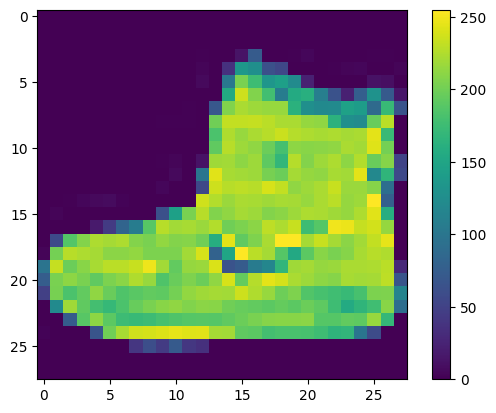

In [ ]:
# processing the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

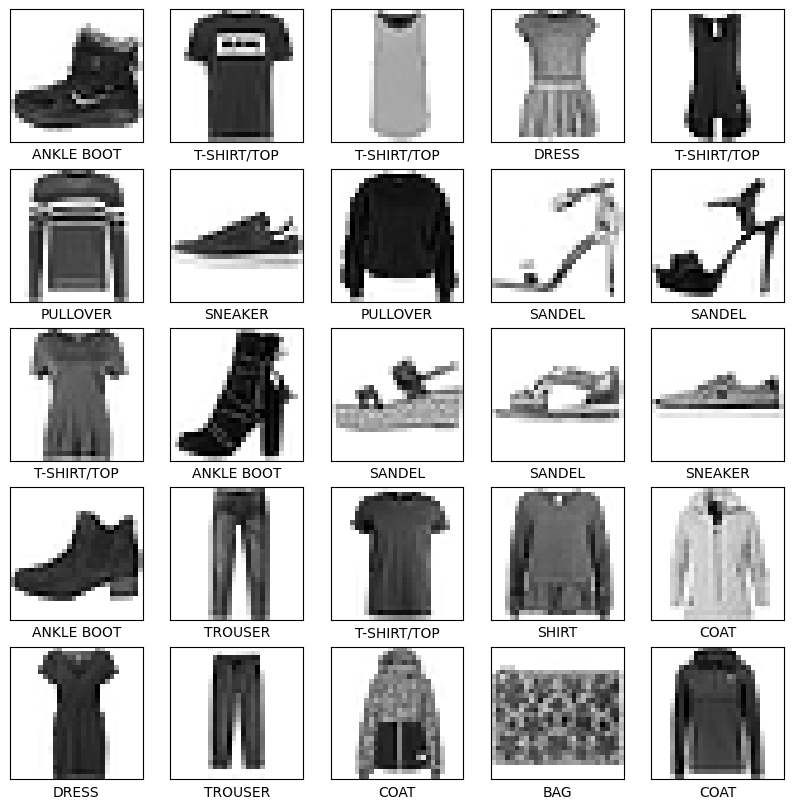

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


# displaying the first 25 images from the training data set along with there class names
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# CNN architecture
# building layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# training the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.4997 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3782 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3400 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3139 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2971 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2821 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2717 - accuracy: 0.8985
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2596 - accuracy: 0.9020
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2491 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [ ]:
# evaluating the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nAccuracy:', test_acc*100)

313/313 - 1s - loss: 0.3254 - accuracy: 0.8865 - 605ms/epoch - 2ms/step

Accuracy: 88.65000009536743


In [ ]:
prediction_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = prediction_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.0586183e-07, 3.4649983e-10, 4.3187175e-08, 2.2403406e-09,
       5.8148100e-07, 2.7868827e-03, 1.7131831e-06, 6.1318497e-03,
       1.1672019e-07, 9.9107873e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

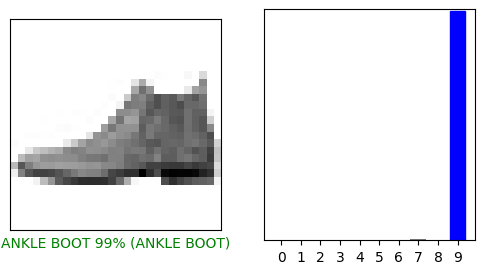

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'blue'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

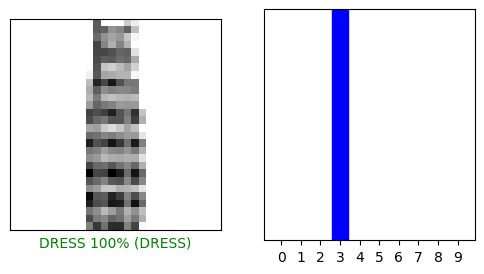

In [ ]:
i = 7896
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

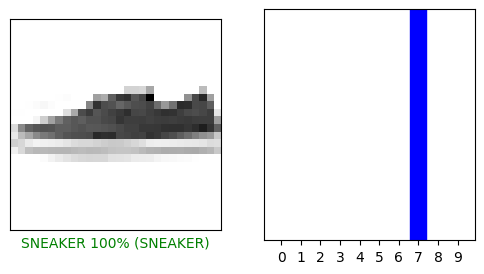

In [ ]:
i = 789
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

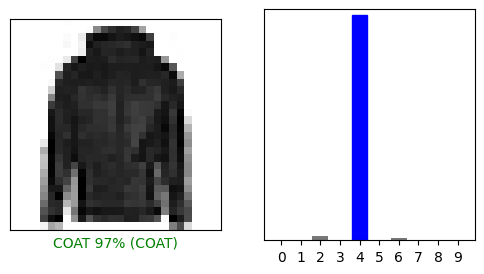

In [ ]:
i = 187
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# testing the trained model
img = test_images[5]
print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = prediction_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[2.16586741e-05 9.99977231e-01 8.93163417e-07 1.01998424e-07
  1.33592906e-08 4.29093436e-12 6.11881745e-08 2.65514852e-17
  3.01540251e-11 1.44475767e-14]]


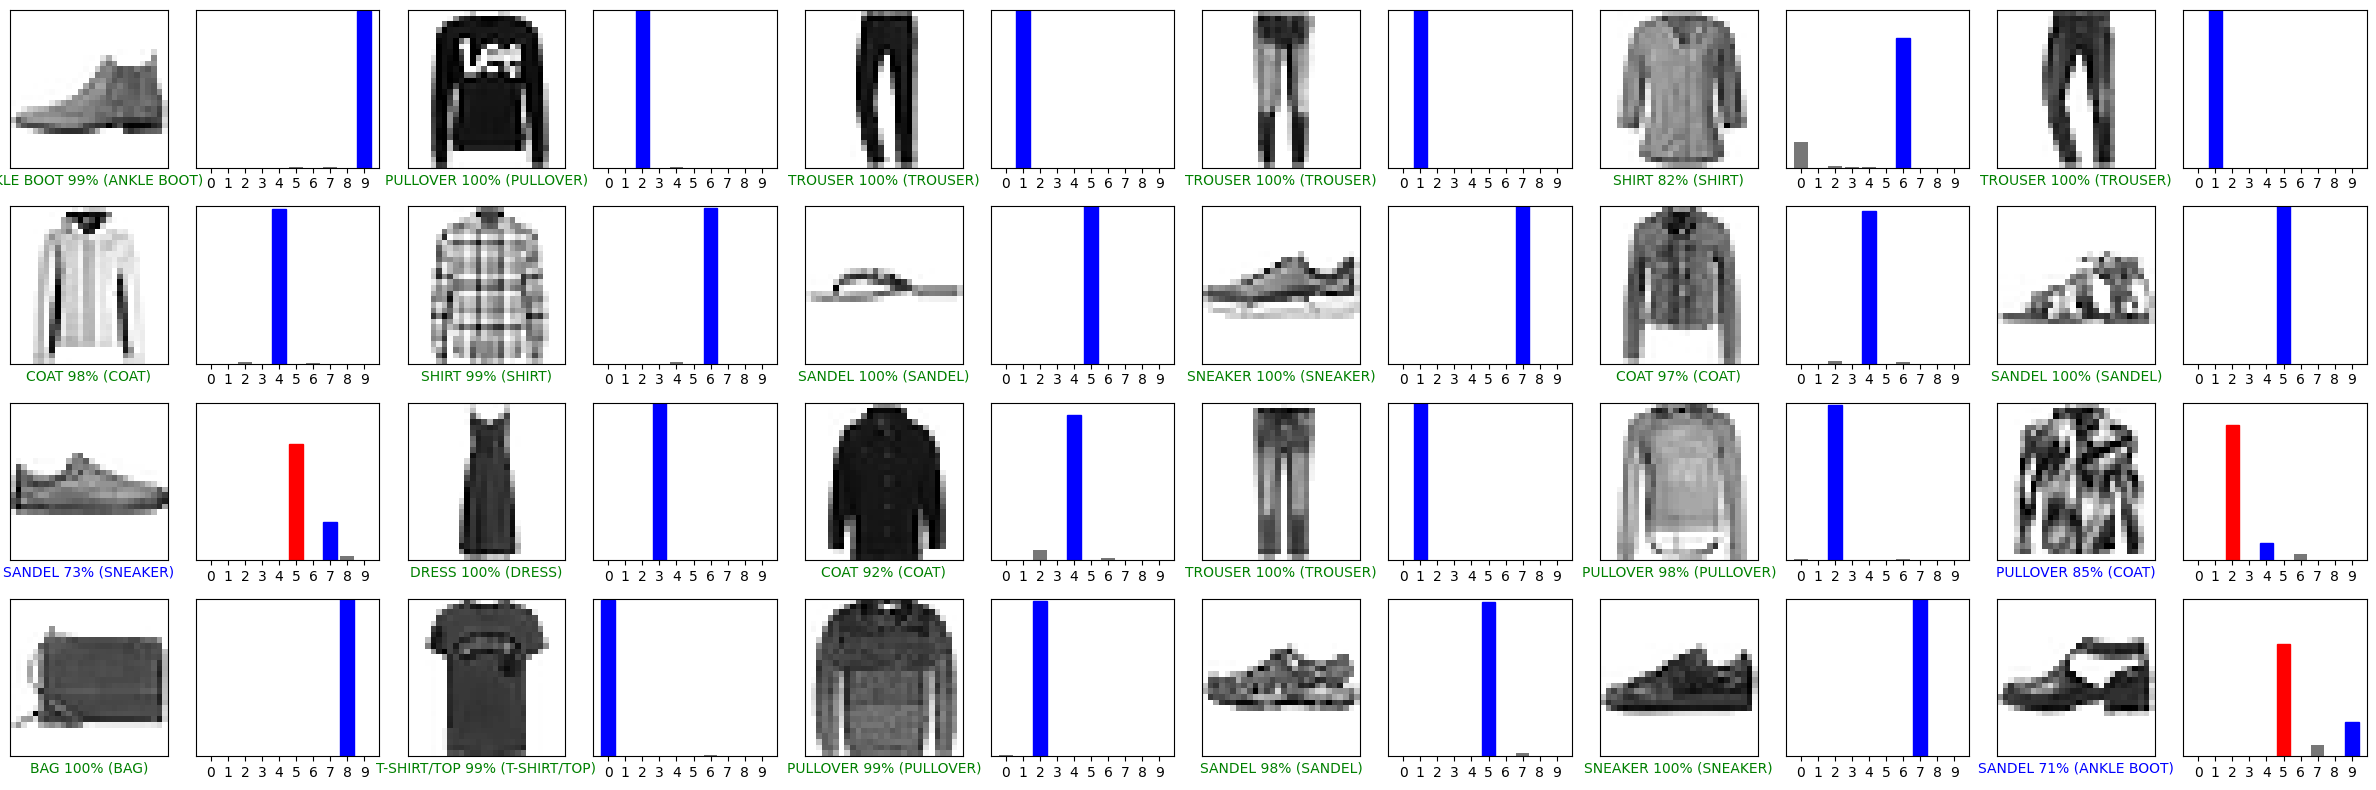

In [ ]:
num_rows = 4
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()